In [84]:
# the project is about predicting the future sales of products based on different datasets and features

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# reading the datasets
sales_train = pd.read_csv('data/sales_train.csv')
items = pd.read_csv('data/items.csv')
item_categories = pd.read_csv('data/item_categories.csv')
shops = pd.read_csv('data/shops.csv')
test = pd.read_csv('data/test.csv')


In [5]:
# checking the first few rows of the datasets
print('\n Sales table \n ')
print(sales_train.head())
print('\n Items table \n ')
print(items.head())

print(sales_train['date_block_num'].unique())


 Sales table 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

 Items table 
 
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  

In [6]:
print('\n Item categories table \n ')
print(item_categories.head())
print('\n Shops table \n ')
print(shops.head())
print('\n Test table \n ')
print(test.head())


 Item categories table 
 
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

 Shops table 
 
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

 Test table 
 
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [7]:
# remove all the features that has names like 'item_name' and 'shop_name' and date_block_num from the datasets
# sales_train = sales_train.drop(['date_block_num'], axis=1)
items = items.drop(['item_name'], axis=1)
shops = shops.drop(['shop_name'], axis=1)
item_categories = item_categories.drop(['item_category_name'], axis=1)

In [8]:
# shape of sales_train before merging
print('\n Shape of sales_train before merging \n ')
print(sales_train.shape)

# merge the datasets
sales_train = sales_train.merge(items, on='item_id')
sales_train = sales_train.merge(shops, on='shop_id')
sales_train = sales_train.merge(item_categories, on='item_category_id')

# shape of sales_train after merging
print('\n Shape of sales_train after merging \n ')
print(sales_train.shape)


# check the first few rows of the merged dataset
print('\n Merged dataset \n ')
print(sales_train.head())


 Shape of sales_train before merging 
 
(2935849, 6)

 Shape of sales_train after merging 
 
(2935849, 7)

 Merged dataset 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  26.04.2013               3       59      944       150.0           1.0   
2  26.06.2013               5       59      944       199.5           1.0   
3  20.07.2013               6       59      944       199.5           1.0   
4  14.09.2013               8       59      944       299.0           2.0   

   item_category_id  
0                37  
1                37  
2                37  
3                37  
4                37  


In [9]:
# replace negative values in item_cnt_day with the 0
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].apply(lambda x: 0 if x < 0 else x)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,26.04.2013,3,59,944,150.0,1.0,37
2,26.06.2013,5,59,944,199.5,1.0,37
3,20.07.2013,6,59,944,199.5,1.0,37
4,14.09.2013,8,59,944,299.0,2.0,37


<AxesSubplot:xlabel='shop_id'>

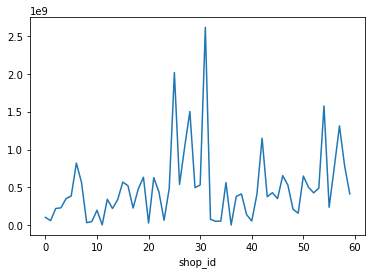

In [10]:
# plot the sales of the products over months
sales_train.groupby('shop_id')['item_id'].sum().plot()

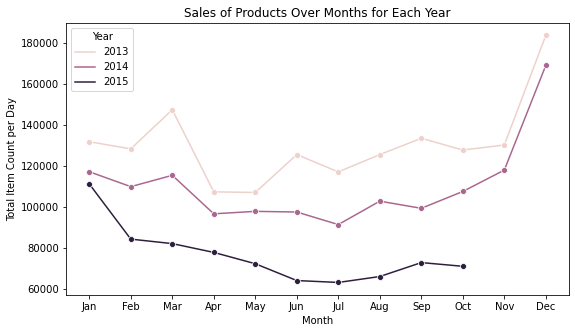

In [11]:

# Plot the sales of the products over months for each year all overlapping on each other so that we can compare them
# Group by year and month to sum item counts per day
# Convert the date column to datetime
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month

# Define month abbreviations
month_abbr = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
sales_train['month_abbr'] = sales_train['month'].map(month_abbr)

# Group by year and month to sum item counts per day
monthly_sales = sales_train.groupby(['year', 'month', 'month_abbr'])['item_cnt_day'].sum().reset_index()

# Sort by month to ensure correct plotting order
monthly_sales = monthly_sales.sort_values(by='month')

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=monthly_sales, x='month_abbr', y='item_cnt_day', hue='year', marker='o')
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Total Item Count per Day')
plt.title('Sales of Products Over Months for Each Year')
plt.show()


In [12]:
# extract day of the year from the date column
sales_train['day_of_year'] = sales_train['date'].dt.dayofyear
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,month_abbr,day_of_year
0,2013-01-02,0,59,22154,999.0,1.0,37,2013,1,Jan,2
1,2013-04-26,3,59,944,150.0,1.0,37,2013,4,Apr,116
2,2013-06-26,5,59,944,199.5,1.0,37,2013,6,Jun,177
3,2013-07-20,6,59,944,199.5,1.0,37,2013,7,Jul,201
4,2013-09-14,8,59,944,299.0,2.0,37,2013,9,Sep,257


In [13]:
# print the total no of times each shop has sold each product, and the year. i want top 5
shop_item_sales = sales_train.groupby(['shop_id', 'item_id', 'year'])['item_cnt_day'].count().sort_values(ascending=False) 
print(shop_item_sales.head())
print(shop_item_sales.tail())
print(shop_item_sales.shape)

shop_id  item_id  year
28       20949    2014    364
54       20949    2014    364
31       20949    2014    364
30       20949    2014    361
27       20949    2014    361
Name: item_cnt_day, dtype: int64
shop_id  item_id  year
22       17409    2015    1
45       2307     2015    1
22       17407    2013    1
         17406    2014    1
59       22167    2014    1
Name: item_cnt_day, dtype: int64
(613817,)


In [12]:
# extract the columns day_of_year, item_cnt_day, year for the shop_id 28 and item_id item_id = 20949

shop_id = 28
item_id = 20949
shop_item_sales_28_20949 = sales_train[(sales_train['shop_id'] == shop_id) & (sales_train['item_id'] == item_id)][['day_of_year', 'item_cnt_day', 'year']]

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)

        day_of_year  item_cnt_day  year
359513          119           2.0  2013
359534          120           5.0  2013
449927          151          18.0  2013
449973          150           9.0  2013
449974          148          15.0  2013
         day_of_year  item_cnt_day  year
2928471          300           2.0  2015
2928472          302          12.0  2015
2928473          303           4.0  2015
2928474          304          15.0  2015
2928660          295           3.0  2015
(867, 3)


In [13]:
# the data is not continuous, we need to fill in the missing days with 0 sales for each year except 2015 which is not complete
# Create a DataFrame with all days of the year for each year
days_of_year = np.arange(1, 366)
years = sales_train['year'].unique()
all_days = pd.DataFrame(np.array(np.meshgrid(years, days_of_year)).T.reshape(-1, 2), columns=['year', 'day_of_year'])

# Merge the DataFrame with the sales data
shop_item_sales_28_20949 = all_days.merge(shop_item_sales_28_20949, on=['year', 'day_of_year'], how='left').fillna(0)

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)


   year  day_of_year  item_cnt_day
0  2013            1           0.0
1  2013            2           0.0
2  2013            3           0.0
3  2013            4           0.0
4  2013            5           0.0
      year  day_of_year  item_cnt_day
1090  2015          361           0.0
1091  2015          362           0.0
1092  2015          363           0.0
1093  2015          364           0.0
1094  2015          365           0.0
(1095, 3)


In [14]:
# count the number of days in each year in the dataset
shop_item_sales_28_20949.groupby('year').size()

year
2013    365
2014    365
2015    365
dtype: int64

In [15]:
# remove the data for the year 2015 after 10.2015 because that is the last date in the dataset. calculate exact day of the year for last of october 2015
last_day_2015 = pd.to_datetime('2015-10-31', format='%Y-%m-%d').dayofyear
print(last_day_2015)

shop_item_sales_28_20949 = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] != 2015) | (shop_item_sales_28_20949['day_of_year'] <= last_day_2015)]

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)


304
   year  day_of_year  item_cnt_day
0  2013            1           0.0
1  2013            2           0.0
2  2013            3           0.0
3  2013            4           0.0
4  2013            5           0.0
      year  day_of_year  item_cnt_day
1029  2015          300           2.0
1030  2015          301           0.0
1031  2015          302          12.0
1032  2015          303           4.0
1033  2015          304          15.0
(1034, 3)


In [16]:
# the day of the year repeats from 1 to 365 for every year. for plotting we need the day to be continuous for all years. create a new column and add number from 1 until the end of the dataset
shop_item_sales_28_20949['day'] = np.arange(1, shop_item_sales_28_20949.shape[0] + 1)

print(shop_item_sales_28_20949.head())
print(shop_item_sales_28_20949.tail())
print(shop_item_sales_28_20949.shape)

   year  day_of_year  item_cnt_day  day
0  2013            1           0.0    1
1  2013            2           0.0    2
2  2013            3           0.0    3
3  2013            4           0.0    4
4  2013            5           0.0    5
      year  day_of_year  item_cnt_day   day
1029  2015          300           2.0  1030
1030  2015          301           0.0  1031
1031  2015          302          12.0  1032
1032  2015          303           4.0  1033
1033  2015          304          15.0  1034
(1034, 4)


In [17]:
# split the data into train and test set. leave last 90 days of 2015 for test set
train = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] != 2015) | (shop_item_sales_28_20949['day_of_year'] <= last_day_2015 - 90)]
test = shop_item_sales_28_20949[(shop_item_sales_28_20949['year'] == 2015) & (shop_item_sales_28_20949['day_of_year'] > last_day_2015 - 90)]

print(train.head())
print(train.shape)

print(test.head())
print(test.shape)


   year  day_of_year  item_cnt_day  day
0  2013            1           0.0    1
1  2013            2           0.0    2
2  2013            3           0.0    3
3  2013            4           0.0    4
4  2013            5           0.0    5
(944, 4)
     year  day_of_year  item_cnt_day  day
944  2015          215           5.0  945
945  2015          216          12.0  946
946  2015          217           2.0  947
947  2015          218           5.0  948
948  2015          219           7.0  949
(90, 4)


In [18]:
# use the day of year and year columns to create a date column
train['date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['day_of_year'].astype(str), format='%Y-%j')
test['date'] = pd.to_datetime(test['year'].astype(str) + '-' + test['day_of_year'].astype(str), format='%Y-%j')
train.head()

/tmp/ipykernel_33/2070648549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['day_of_year'].astype(str), format='%Y-%j')
/tmp/ipykernel_33/2070648549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.to_datetime(test['year'].astype(str) + '-' + test['day_of_year'].astype(str), format='%Y-%j')


,year,day_of_year,item_cnt_day,day,date
0,2013,1,0.0,1,2013-01-01
1,2013,2,0.0,2,2013-01-02
2,2013,3,0.0,3,2013-01-03
3,2013,4,0.0,4,2013-01-04
4,2013,5,0.0,5,2013-01-05


In [19]:
# using fb prophet to predict the sales of the product
from prophet import Prophet

# Create a new DataFrame for Prophet model
train_prophet = train[['date', 'item_cnt_day']]
train_prophet.columns = ['ds', 'y']

# Instantiate the Prophet model and fit it to the data
model = Prophet()
model

In [20]:
# predict the future sales of the productt
model.fit(train_prophet)

09:32:40 - cmdstanpy - INFO - Chain [1] start processing
09:32:40 - cmdstanpy - INFO - Chain [1] done processing


In [21]:

# forecast the future sales for next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1029,2015-10-27,2.205171,-7.278552,11.861177
1030,2015-10-28,1.871564,-8.146429,11.542011
1031,2015-10-29,4.084952,-5.986213,13.814377
1032,2015-10-30,6.793675,-3.636312,16.673022
1033,2015-10-31,18.664902,8.759018,28.590165


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


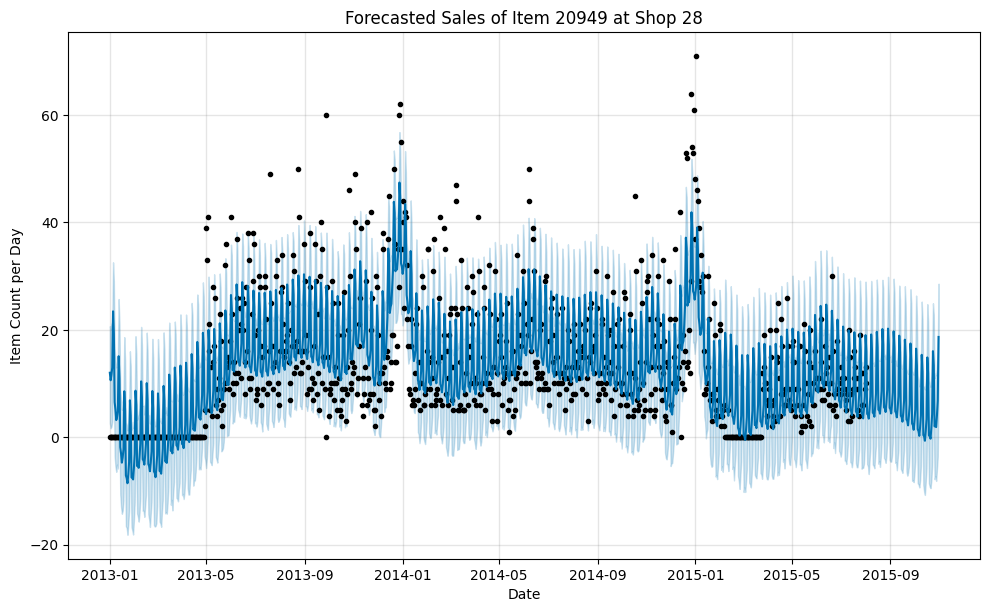

In [22]:
# plot the forecasted sales
fig = model.plot(forecast)
plt.title('Forecasted Sales of Item 20949 at Shop 28')
plt.xlabel('Date')
plt.ylabel('Item Count per Day')
plt.show()


In [102]:
# # train a time series model to predict the sales of the product for the next 90 days using ARIMA
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # Define the model
# model = ARIMA(train['item_cnt_day'], order=(5, 1, 0))

# # Fit the model
# model_fit = model.fit()


In [103]:
# # Predict the next 90 days
# forecast = model_fit.forecast(steps=90)

# # Calculate the root mean squared error
# rmse = sqrt(mean_squared_error(test['item_cnt_day'], forecast))
# print(rmse)

5.185496324833378


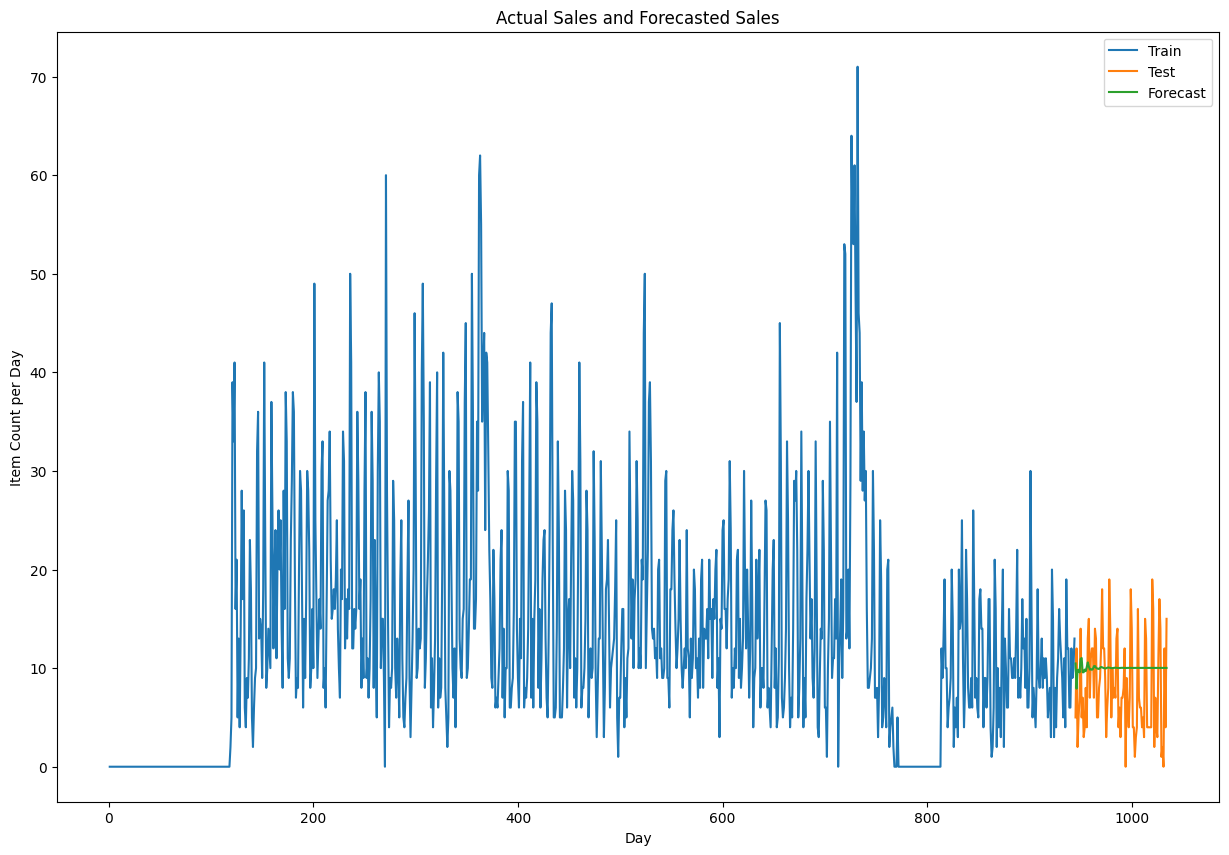

In [105]:
# # plot the actual sales and the forecasted sales
# plt.figure(figsize=(15, 10))
# plt.plot(train['day'], train['item_cnt_day'], label='Train')
# plt.plot(test['day'], test['item_cnt_day'], label='Test')
# plt.plot(test['day'], forecast, label='Forecast')
# plt.xlabel('Day')
# plt.ylabel('Item Count per Day')
# plt.title('Actual Sales and Forecasted Sales')
# plt.legend()
# plt.show()



In [17]:
# now that we have predictions for one shop and 1 id we can do the same for all the shops and ids in a loop

# getting unique shoop id from testcsv
shop_ids = test['shop_id'].unique()
item_ids = test['item_id'].unique()
print(shop_ids)
print(len(item_ids))

[ 5  4  6  3  2  7 10 12 28 31 26 25 22 24 21 15 16 18 14 19 42 50 49 53
 52 47 48 57 58 59 55 56 36 37 35 38 34 46 41 44 39 45]
5100


In [ ]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# we want only predictions for those with unique combinations of shop id and item id present in test set 

# Create a DataFrame to store the predictions
predictions = pd.DataFrame(columns=['shop_id', 'item_id', 'date', 'item_cnt_day'])

# Loop through each shop and item
for shop_id in shop_ids:
    for item_id in item_ids:
        # Get the sales data for the shop and item
        shop_item_sales = sales_train[(sales_train['shop_id'] == shop_id) & (sales_train['item_id'] == item_id)][['day_of_year', 'item_cnt_day', 'year']]
        
        # Create a DataFrame with all days of the year for each year
        days_of_year = np.arange(1, 366)
        years = shop_item_sales['year'].unique()
        all_days = pd.DataFrame(np.array(np.meshgrid(years, days_of_year)).T.reshape(-1, 2), columns=['year', 'day_of_year'])
        
        # Merge the DataFrame with the sales data
        shop_item_sales = all_days.merge(shop_item_sales, on=['year', 'day_of_year'], how='left').fillna(0)
        
        # Remove the data for the year 2015 after 10.2015
        shop_item_sales = shop_item_sales[(shop_item_sales['year'] != 2015) | (shop_item_sales['day_of_year'] <= last_day_2015)]
        
        # Create a continuous day column
        shop_item_sales['day'] = np.arange(1, shop_item_sales.shape[0] + 1)
        
        # Split the data into train and test sets
        train = shop_item_sales[(shop_item_sales['year'] != 2015) | (shop_item_sales['day_of_year'] <= last_day_2015 - 90)]
        test = shop_item_sales[(shop_item_sales['year'] == 2015) & (shop_item_sales['day_of_year'] > last_day_2015 - 90)]
        
        # Create a date column
        train.loc[:, 'date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['day_of_year'].astype(str), format='%Y-%j')
        test.loc[:, 'date'] = pd.to_datetime(test['year'].astype(str) + '-' + test['day_of_year'].astype(str), format='%Y-%j')
        
        # Create a new DataFrame for Prophet model
        train_prophet = train[['date', 'item_cnt_day']]
        train_prophet.columns = ['ds', 'y']
        
        # Instantiate the Prophet model and fit it to the data
        model = Prophet()
        model.fit(train_prophet)
        
        # Forecast the future sales for next 90 days
        future = model.make_future_dataframe(periods=90)
        forecast = model.predict(future)
    
        # Append the predictions to the DataFrame using pd.concat
        forecast['shop_id'] = shop_id
        forecast['item_id'] = item_id
        forecast = forecast[['ds', 'yhat', 'shop_id', 'item_id']]
        forecast.columns = ['date', 'item_cnt_day', 'shop_id', 'item_id']
        predictions = pd.concat([predictions, forecast.tail(90)], ignore_index=True)

# Save the predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)

